Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_tst_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_fission_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_fission_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 4)
(6459, 4)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPNCRNA.1144,1.217305,8.521276,2.715801,9.341284e+00,0.002240,1
SPCC417.06c,1.412600,-5.961226,2.005189,8.669340e+00,0.003236,1
SPNCRNA.488,5.104772,-3.670428,1.277721,8.477169e+00,0.003596,1
SPAC1A6.08c,28.279930,1.553550,0.530327,8.324654e+00,0.003911,1
SPNCRNA.1387,1.468483,-5.613072,2.101783,8.097483e+00,0.004433,1
...,...,...,...,...,...,...
SPBC31F10.15c,441.505530,-0.000098,0.241508,1.484479e-07,0.999693,1
SPAC139.06,354.301526,-0.000020,0.248570,4.083859e-09,0.999949,1
SPNCRNA.1326,3.825882,-0.061994,3.192256,-4.851704e-04,1.000000,1
SPAC513.04,1.076923,-0.820488,3.293259,-2.406579e-02,1.000000,1


In [4]:
DESeq_sorted.index.values[0:30]

array(['SPNCRNA.1144', 'SPCC417.06c', 'SPNCRNA.488', 'SPAC1A6.08c',
       'SPNCRNA.1387', 'SPCTRNAILE.09', 'SPNCRNA.536', 'SPRRNA.30',
       'SPAC11D3.01c', 'SPNCRNA.860', 'SPNCRNA.1068', 'SPNCRNA.1600',
       'SPNCRNA.1314', 'SPNCRNA.811', 'SPRRNA.40', 'SPNCRNA.691',
       'SPNCRNA.1414', 'SPAC6G9.03c', 'SPCC1906.04', 'SPNCRNA.886',
       'SPNCRNA.1261', 'SPNCRNA.1622', 'SPBC2F12.17', 'SPNCRNA.1575',
       'SPNCRNA.415', 'SPNCRNA.742', 'SPNCRNA.786', 'SPBC11B10.05c',
       'SPBC1861.06c', 'SPNCRNA.283'], dtype=object)

In [5]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPBC887.07,-176.241607,-91.792554,401.962773,486.411826
SPNCRNA.1270,-119.734764,-43.139079,-46.092014,30.503670
SPAP27G11.13c,-281.553889,-126.768951,-125.212195,29.572743
SPAC186.05c,-207.496309,-88.503038,-89.823490,29.169780
SPAC6B12.15,-370.623884,-169.983642,-174.457396,26.182845
...,...,...,...,...
SPBC20F10.03,-216.837362,-133.433189,-133.936371,-50.532198
SPAC22F8.05,-286.399318,-169.843057,-167.594906,-51.038645
SPBC660.07,-258.573091,-156.017383,-154.493770,-51.938062
SPCC1183.11,-262.040711,-158.642228,-158.257383,-54.858899


In [9]:
GPcounts_NB_sorted.index.values[0:30]

array(['SPBC887.07', 'SPNCRNA.1270', 'SPAP27G11.13c', 'SPAC186.05c',
       'SPAC6B12.15', 'SPNCRNA.857', 'SPBC3B8.08', 'SPNCRNA.957',
       'SPNCRNA.1457', 'SPNCRNA.1183', 'SPBC30B4.07c', 'SPCC70.08c',
       'SPAC186.04c', 'SPBC146.12', 'SPAC750.05c', 'SPAC186.06',
       'SPBC23G7.10c', 'SPAC513.03', 'SPAC186.01', 'SPNCRNA.1487',
       'SPAC186.08c', 'SPAC186.02c', 'SPSNORNA.44', 'SPBC19C7.05',
       'SPAC19G12.17', 'SPAC869.07c', 'SPNCRNA.802', 'SPAC212.04c',
       'SPBC17D1.07c', 'SPCC24B10.03'], dtype=object)

In [6]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.1318,-48.749889,32.516546,-11.639469,69.626967
SPBC1289.01c,14.226733,38.042643,39.548352,63.364261
SPBC651.02,7.378886,32.349430,36.833382,61.803925
SPAC1071.10c,-16.786088,-12.743568,54.026128,58.068649
SPAC14C4.03,-50.616821,28.145686,-22.681630,56.080877
...,...,...,...,...
SPCC830.09c,63.844416,-12.219341,-12.098726,-88.162483
SPATRNAGLU.02,70.011306,-6.024988,-12.345320,-88.381614
SPAC589.10c,80.696623,-4.005424,-3.729781,-88.431828
SPAC1F12.07,106.237400,-5.965165,-3.712658,-115.915223


0.1
0.29242964068709804


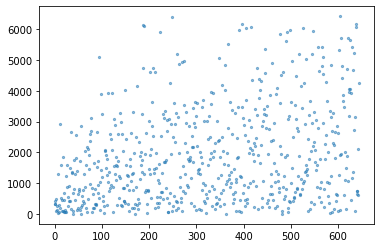

0.18210881393694192


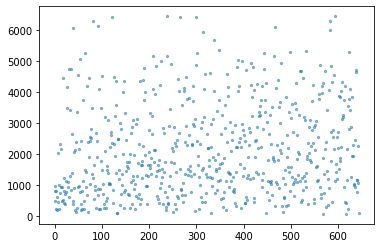

0.2
0.27383916823320725


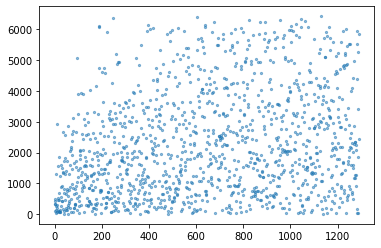

0.19470317359072284


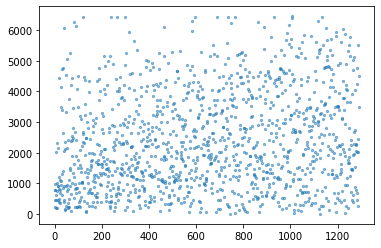

0.30000000000000004
0.2935902525912481


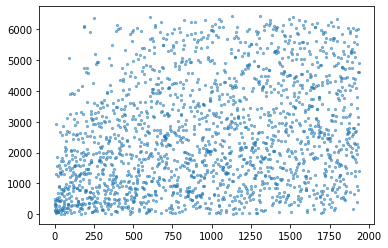

0.19820751399557102


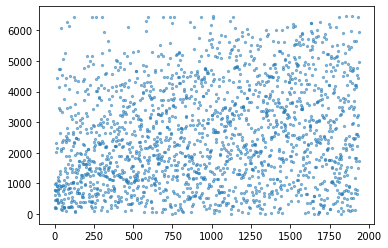

0.4
0.2935114034019567


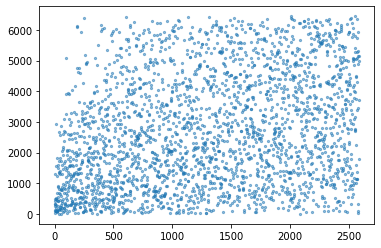

0.21032631772412574


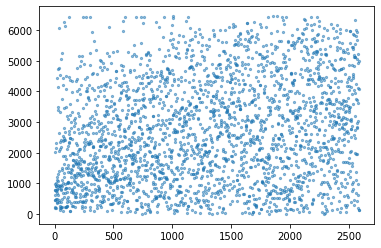

0.5
0.27353490278376297


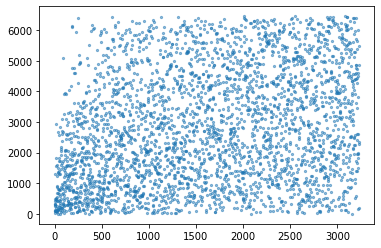

0.24167284331311273


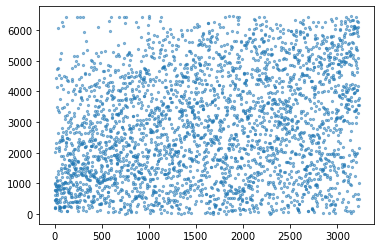

0.6000000000000001
0.29856891234992855


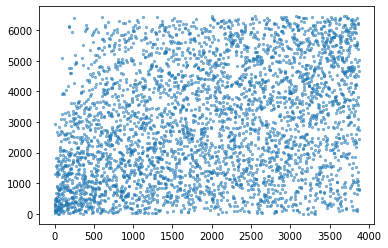

0.2527838778096477


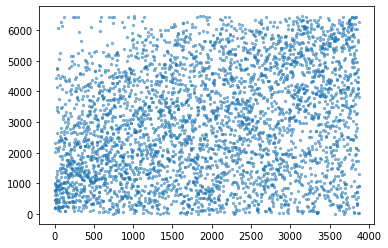

0.7000000000000001
0.2851435983150221


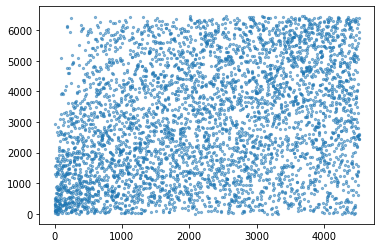

0.25060617780967287


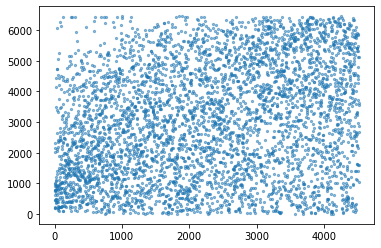

0.8
0.2735258999541351


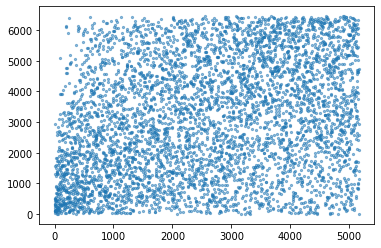

0.25111658815049975


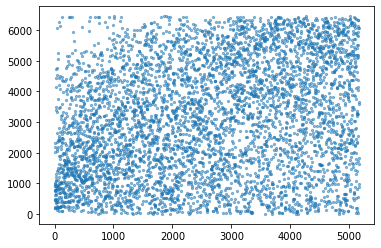

0.9
0.2762901279269338


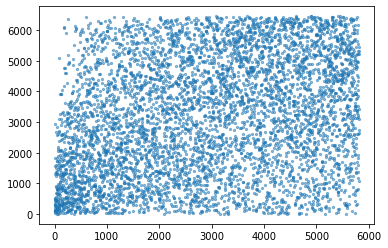

0.2655611584611499


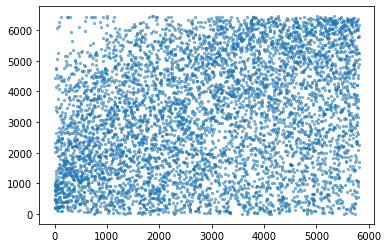

1.0
0.2582603913478639


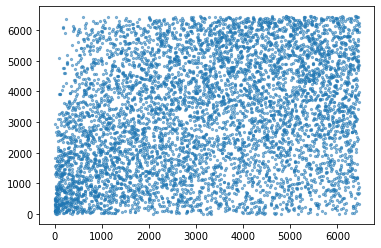

0.2570887472221647


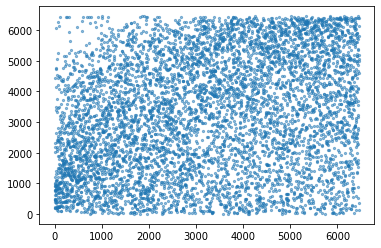

In [7]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

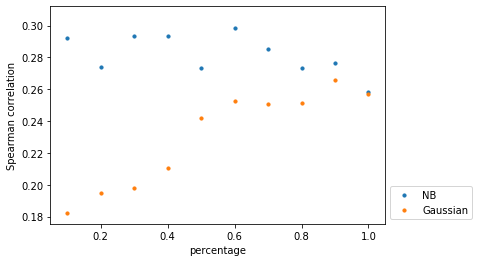

In [8]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)